
# Project: NO-Show appointment - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### * Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up 




### Question(s) for Analysis
 1)in this project, we will try to find what are the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2)is it will help us to understand the benifit of Brasilian welfare program Bolsa Família?

3)How can we predict the no show appointmment given patients' informtion ?

4)Does the age of patients affect the likelihood of no-show appointments ?

5)Does the no show history of patients afeect the no show next time ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

##### tip in this part we will load ,check for cleanliness  and clean the dataset for  analysis.


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# explore the shape of data

df.shape

(110527, 14)

##### we have  14 columns and 110527 rows

In [4]:
#explore the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### no missing DATA

In [5]:
#check for duplications
df.duplicated().sum()

0

#### no duplicated rows

In [6]:
#check for duplications in patients ids
df['PatientId'].duplicated().sum()

48228

In [7]:
#check the number of unique values
df['PatientId'].nunique()


62299

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### The maximuim age is 115
##### the mean of ages is 37
##### but we have a propblem or mistake because one of the patients' age = -1 and it does not make sense

In [9]:
#identifying the row which has -1 value in the age
mask=df.query('Age== "-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
it is time to clean data from ( row which has -1 value for age) and unnecessary data 
 

In [10]:
#remove the row which has -1 value for age
df.drop(index=99832,inplace=True)


In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### now it is acceptable because we remove the row (age= -1 )

In [12]:
#remove unused data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1 , inplace=True)
df.head()



,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#we have to correct the columns names 

df.rename(columns={'No-show' :'No_show' },inplace=True)
df.rename(columns={'Hipertension' :'Hypertention' },inplace=True)  
df.head() 

,Gender,Age,Neighbourhood,Scholarship,Hypertention,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


in this part we will exploratory Data by using plot, hist and bar 



### General  look 

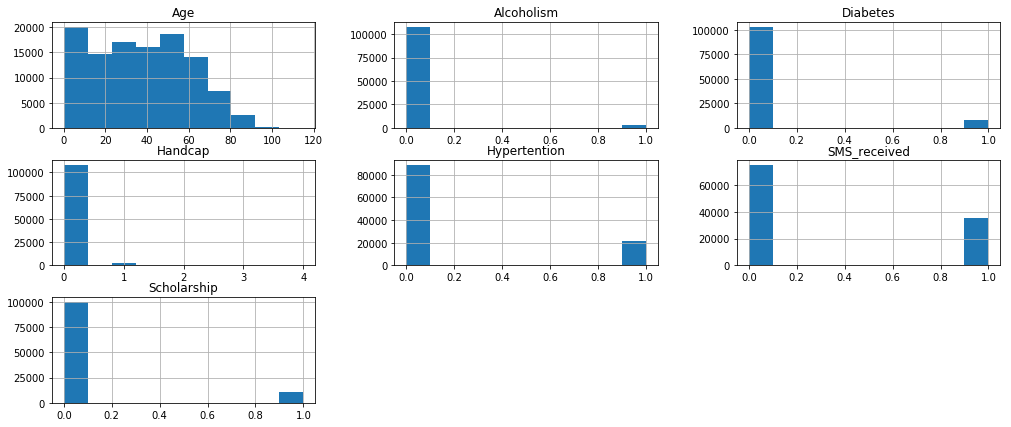

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df.hist (figsize=(17,7));

#####  about 15000 are enrolled in barasilian welfare program .
##### the number of patients who receieved an SMS is 40 % the number of those who did not resevieved .
##### most of the patients didn't suffer from chronic diseases nor are handicapped ,diabetes .
#####  

In [15]:
#rename names to show and no show to facilities recall
show = df.No_show =='No'
noshow = df.No_show == 'Yes'

In [16]:
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertention     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [17]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertention     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

##### by theses data we can say that the the number of patients  who showed at the cilinic about 4 times who did not show 

### it's time to Analysing  and Exploring 

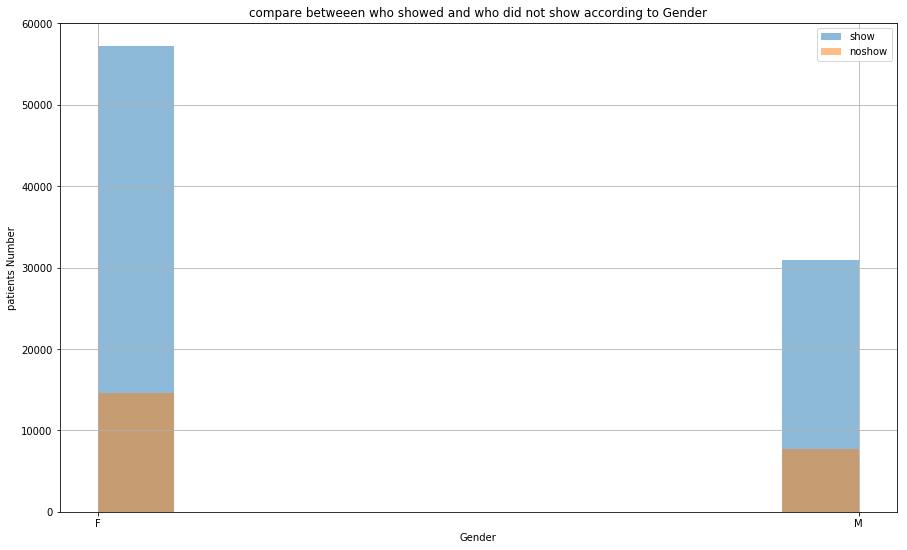

In [18]:
#compare betweeen who showed and who didn't show according to gender.

plt.figure(figsize=[15,9])
df.Gender[show].hist(alpha=0.5,label='show')
df.Gender[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to Gender')
plt.xlabel('Gender');
plt.ylabel('patients Number');          

In [19]:
#compare betweeen who showed and who didn't show according to gender.

print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())


F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


##### from these data, we can notice that the females who showed are more than the male and also the females who did not show are more than the male too

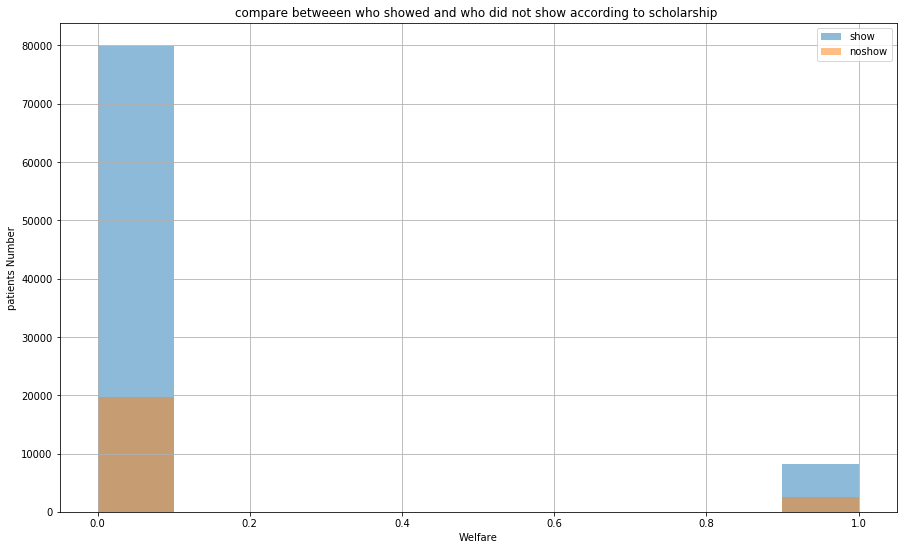

In [20]:
# compare betweeen who showed and who didn't show according to scholarship 
plt.figure(figsize=[15,9])
df.Scholarship[show].hist(alpha=0.5,label='show')
df.Scholarship[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to scholarship ')
plt.xlabel('Welfare');
plt.ylabel('patients Number');    

##### being a part of the scholarship program ( Brasilian welfare program ) is noting and did not add anything 

In [21]:
# compare betweeen who showed and who didn't show according to scholarship 
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79924
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


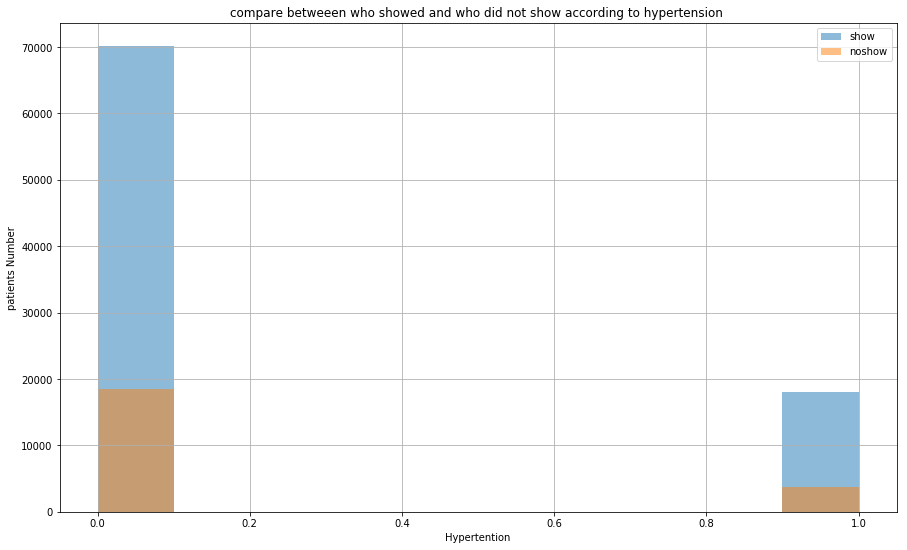

In [22]:
# compare betweeen who showed and who did not show according to hypertension
plt.figure(figsize=[15,9])
df.Hypertention[show].hist(alpha=0.5,label='show')
df.Hypertention[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to hypertension ')
plt.xlabel('Hypertention');
plt.ylabel('patients Number');   

##### hypertension does not add anything for comparison 

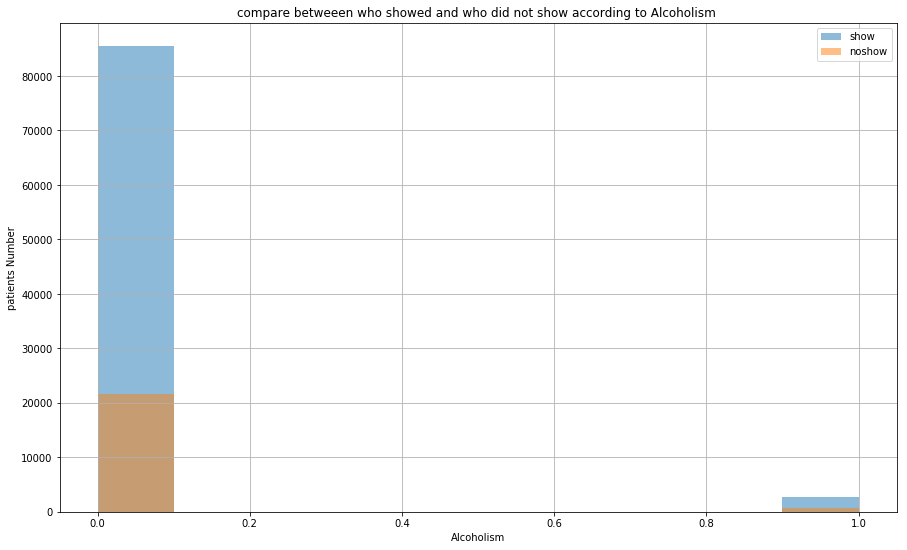

In [24]:
# compare betweeen who showed and who did not show according to Alcoholism

plt.figure(figsize=[15,9])
df.Alcoholism[show].hist(alpha=0.5,label='show')
df.Alcoholism[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to Alcoholism ')
plt.xlabel('Alcoholism');
plt.ylabel('patients Number');   

#### Alcoholism does not add anything to comparsion 

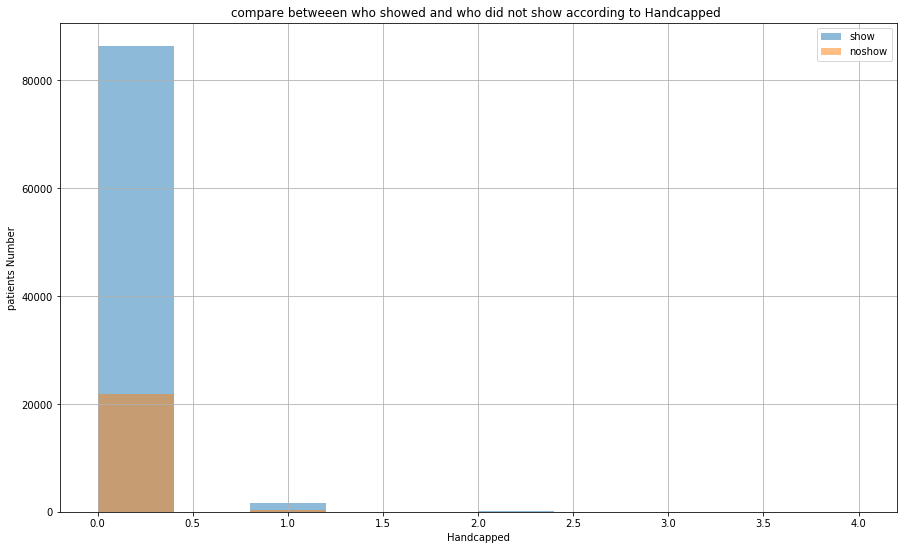

In [25]:
# compare betweeen who showed and who did not show according to Handcapped

plt.figure(figsize=[15,9])
df.Handcap[show].hist(alpha=0.5,label='show')
df.Handcap[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to Handcapped ')
plt.xlabel('Handcapped');
plt.ylabel('patients Number');   

#### Handcapped does not add anything to comparsion 

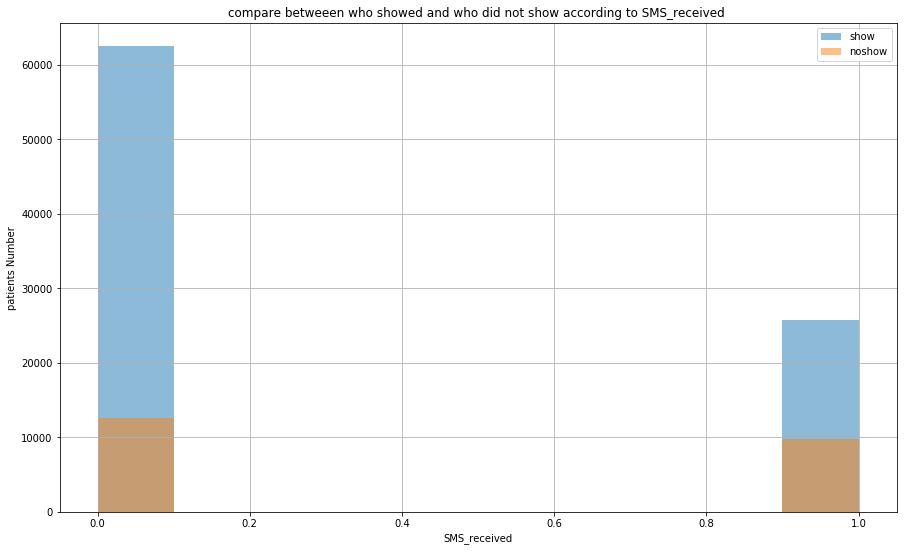

In [26]:
# compare betweeen who showed and who did not show according to SMS_received

plt.figure(figsize=[15,9])
df.SMS_received[show].hist(alpha=0.5,label='show')
df.SMS_received[noshow].hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to SMS_received ')
plt.xlabel('SMS_received');
plt.ylabel('patients Number'); 

#### it is something weird because the people who did not receive the SMS showed more than those who receive 

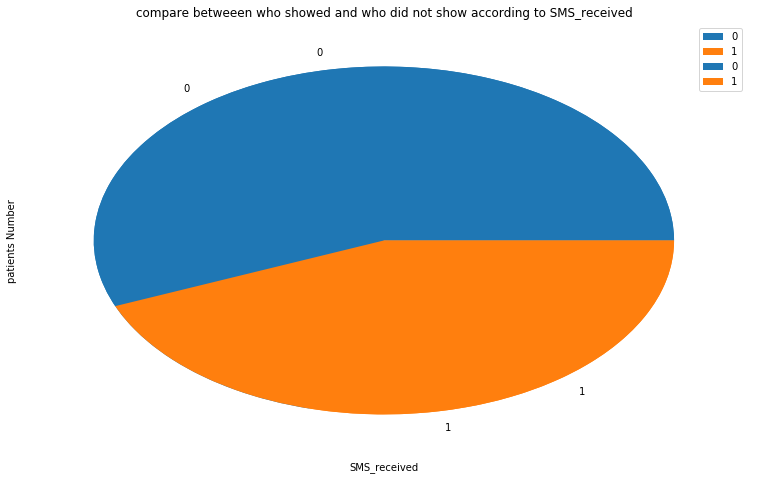

In [27]:
#compare betweeen who showed and who didn't show according to SMS_received.

plt.figure(figsize=[13,8])
df.SMS_received[show].value_counts().plot(kind='pie',label='show')
df.SMS_received[noshow].value_counts().plot(kind='pie',label='show')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to SMS_received')
plt.xlabel('SMS_received');
plt.ylabel('patients Number');   

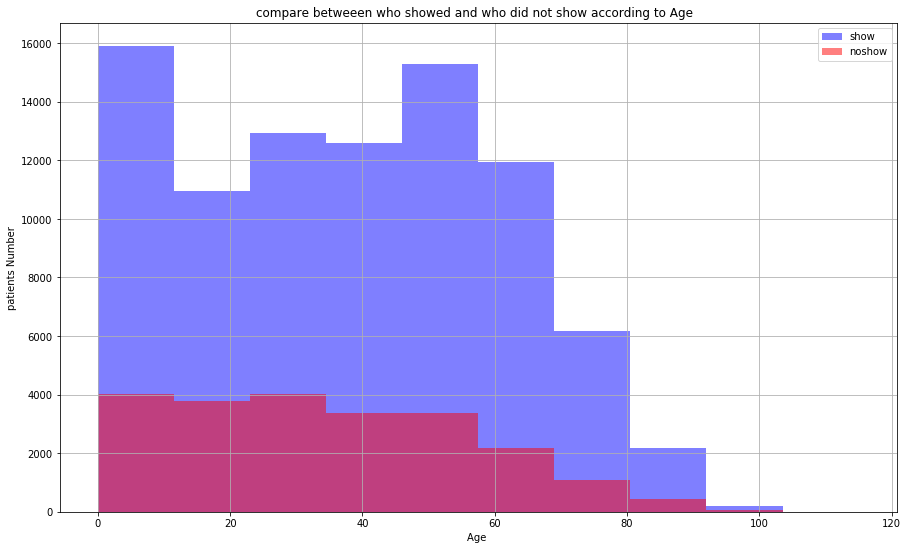

In [28]:
# compare betweeen who showed and who did not show according to age
def attend(df,column_name,attendance,absence):
    
    plt.figure(figsize=[15,9])
    df[column_name][show].hist(alpha=0.5,label='show',color='blue', bins=10)
    df[column_name][noshow].hist(alpha=0.5,label='noshow',color='red',bins=10)
    plt.legend()
    plt.title('compare betweeen who showed and who did not show according to Age  ')
    plt.xlabel('Age ');
    plt.ylabel('patients Number');

attend(df,'Age',show,noshow)
    
    


##### ages feom 0 :10 are the most showing  ,,, then ages from 45:55 ,,,,, then the least attending are the people whom above 70 years

##### from these data we can recognise that the patients in the age group (0-10) showed more than all other age groups.

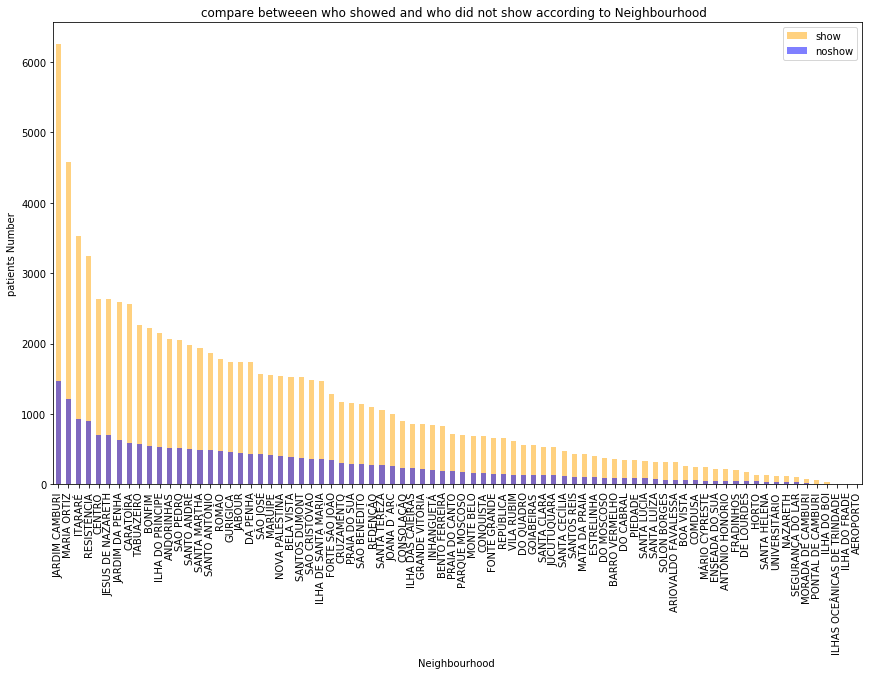

In [29]:
# compare betweeen who showed and who did not show according to Neighbourhood

plt.figure(figsize=[14.5,8.5])
df.Neighbourhood[show].value_counts().plot(alpha=0.5,kind='bar',label='show',color='orange')
df.Neighbourhood[noshow].value_counts().plot(alpha=0.5,label='noshow',kind='bar',color='blue')
plt.legend()
plt.title('compare betweeen who showed and who did not show according to Neighbourhood  ')
plt.xlabel('Neighbourhood ');
plt.ylabel('patients Number'); 

##### it seems that neiborhood is storngly affecting the showing of patients at the clinic .

<a id='conclusions'></a>
## Conclusions

At the end, we can say that neighborhood is strongly related to the patients showing up at the clinic.

Number of showing patients without receiving SMS is greater than patients with receiving SMS( and it sounds strange)

Number of showing patients from specific neighborhoods affected by receiving SMS and Ages.

Age has a clear influence on the showing rate ages from 0:8 are the most showing (parents taking care of their kids ) then from 45:55 and the least attending are whom above 65 years old .

jardim camburi has the greaest number of patients and the hieghest showing rate .


### LIMITATION:
1)we can't use these data to detect a direct a correlation between showing and no showing patients such as ( Gender, disabilities, chronic diseases)


2)no clear  correlation between showing and no showing in most of data 

## Submitting your Project 



In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0